## No rooted-out branching - Method 1

In [1]:
%run imports.py

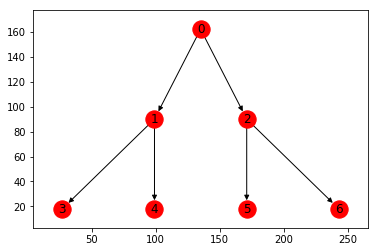

In [2]:
G = nx.balanced_tree(create_using=nx.DiGraph(), h=2, r=2)
layout = graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos=layout)

Find root, $r$

In [3]:
root = [n for n,d in G.in_degree() if d==0][0]
root

0

Children of root, $\{ c_0, c_1 \}$

In [4]:
c = [n for n in G.neighbors(root)]
c

[1, 2]

Delete one of the edges so that we have 2 disconnected trees

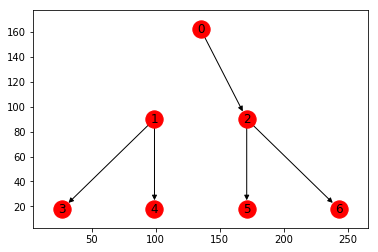

In [5]:
del_edge_to = c[0]
keep_edge_to = c[1]
G.remove_edge(root, del_edge_to)
nx.draw_networkx(G, pos=layout)

In [6]:
children_small = [n for n in G.neighbors(del_edge_to)]
children_small

[3, 4]

In [7]:
children_big = [n for n in G.neighbors(keep_edge_to)]
children_big

[5, 6]

In [8]:
#G.add_edge(children_small[1],children_big[0])
G.add_edge(5,4)

Connect edges to no longer have a tree structure

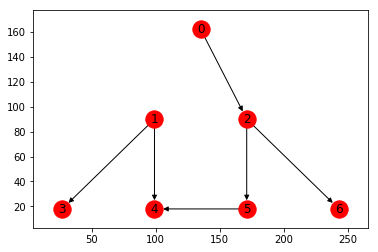

In [9]:
nx.draw_networkx(G, pos=layout)

In [10]:
N = nx.number_of_nodes(G)
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

4

In [11]:
init = np.random.rand(N)
f1 = lambda t,x: np.asarray(-L.dot(x))[0]
res1 = solve_ivp(fun=f1, t_span=[0,100], y0=init)

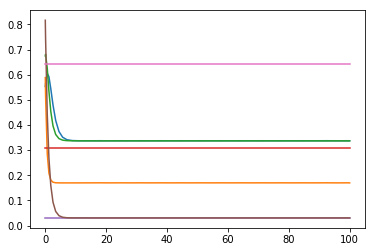

In [12]:
for i in np.arange(0,N):
    plt.plot(res1.t, res1.y[i,:])

In [13]:
res1.y[:,-1]

array([0.33720622, 0.16976133, 0.33705726, 0.30900976, 0.03037382,
       0.03037382, 0.64388966])

### Symmetrization

In [14]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [15]:
f2 = lambda t,x: np.asarray(-eqL.dot(x))[0]
res2 = solve_ivp(fun=f2, t_span=[0,20], y0=init)

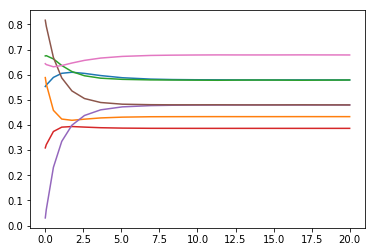

In [16]:
for i in np.arange(0,N):
    plt.plot(res2.t, res2.y[i,:], label=i)

In [17]:
res2.y[:,-1]

array([0.57928949, 0.43330044, 0.57913776, 0.38671819, 0.47983737,
       0.47992232, 0.67870324])

Final result

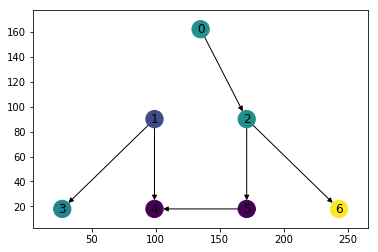

In [18]:
nx.draw_networkx(G, node_color = res1.y[:,-1], pos=layout)

In [19]:
init-res1.y[:,-1]

array([0.21602402, 0.41895598, 0.33776691, 0.        , 0.        ,
       0.78649004, 0.        ])

In [20]:
print(eqL)

[[ 0.61438356 -0.03287671 -0.4760274   0.01643836  0.0109589  -0.06369863
  -0.06917808]
 [-0.03287671  1.44657534 -0.05479452 -0.72328767 -0.48219178 -0.19726027
   0.04383562]
 [-0.4760274  -0.05479452  1.706621    0.02739726  0.01826484 -0.60616438
  -0.6152968 ]
 [ 0.01643836 -0.72328767  0.02739726  0.36164384  0.24109589  0.09863014
  -0.02191781]
 [ 0.0109589  -0.48219178  0.01826484  0.24109589  0.66073059 -0.43424658
  -0.01461187]
 [-0.06369863 -0.19726027 -0.60616438  0.09863014 -0.43424658  0.86780822
   0.33493151]
 [-0.06917808  0.04383562 -0.6152968  -0.02191781 -0.01461187  0.33493151
   0.34223744]]


In [21]:
eq_neg_G = nx.Graph()

for i in np.arange(0,N):
    for j in np.arange(i+1,N):
        if(eqL[i,j] > 1e-6):
            eq_neg_G.add_edge(i,j,weight=eqL[i,j])

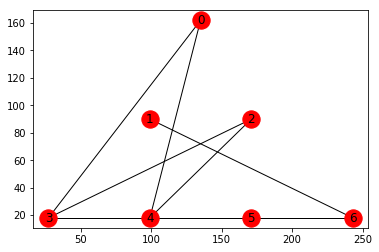

In [24]:
nx.draw_networkx(eq_neg_G, pos=layout)

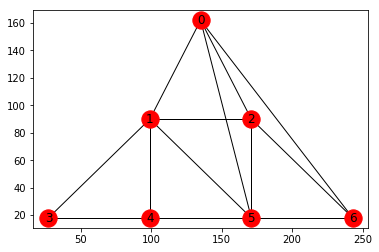

In [25]:
eq_pos_G = nx.Graph()

for i in np.arange(0,N):
    for j in np.arange(i+1,N):
        if(eqL[i,j] < -1e-6):
            eq_pos_G.add_edge(i,j,weight=eqL[i,j])

nx.draw_networkx(eq_pos_G, pos=layout)

In [1]:
N

NameError: name 'N' is not defined